In [1]:
from sklearn.ensemble import RandomForestClassifier
import cv2 as cv
import numpy as np
import os
import matplotlib.pyplot as plt
from keras.layers import Input, Dense, Conv2D, MaxPool2D, GlobalAveragePooling2D
from keras.models import Sequential, Model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf

### setup our data

In [2]:
import os

# Base dataset directory (local)
base_dir = r"K:\DL_Anemia_Jaundice\anemia_model\data\New_Augmented_Anemia_Dataset\Conjuctiva"

train_dr = os.path.join(base_dir, "Training")
valid_dr = os.path.join(base_dir, "Validation")

anemia_data_dir = os.path.join(train_dr, "Anemic")
non_anemia_data_dir = os.path.join(train_dr, "Non-Anemic")

# Count Anemic images
i = len(os.listdir(anemia_data_dir))
print(f"number of training Anemic data is {i}")

# Count Non-Anemic images
j = len(os.listdir(non_anemia_data_dir))
print(f"number of training Non-Anemic data is {j}")


number of training Anemic data is 4219
number of training Non-Anemic data is 4037


In [3]:
from tensorflow.keras.preprocessing.image import load_img
import os

# Local path to your dataset
img_path = r"K:\DL_Anemia_Jaundice\anemia_model\data\New_Augmented_Anemia_Dataset\Finger_Nails\Training\Anemic\Anemic-FN-001_aug1.png"

# Load image
img_1 = load_img(img_path)
print("Image size:", img_1.size)

# If you also want to display
img_1.show()


Image size: (224, 224)


### Load our data (using ImageDataGenerator) and  , rescale it 

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=20,  # Rotate images by 20 degrees
    width_shift_range=0.2,  # Shift images horizontally by 20% of the width
    height_shift_range=0.2,  # Shift images vertically by 20% of the height
    shear_range=0.2,  # Shear intensity (shear angle in radians)
    zoom_range=0.2,  # Zoom range [1-zoom_range, 1+zoom_range]
    horizontal_flip=True,  # Flip images horizontally
    fill_mode='nearest'  # Fill mode for filling in newly created pixels
)

### resize the images

In [5]:
train_generator = datagen.flow_from_directory(
    train_dr,  # Path to the training data directory
    target_size=(64, 64),  # Resize images to (64, 64)
    batch_size=32,
    class_mode='binary'  # Assuming binary classification (change as needed)
)

Found 8256 images belonging to 2 classes.


In [6]:
valid_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    valid_dr,  # Path to the validation data directory
    target_size=(64, 64),  # Resize images to (64, 64)
    batch_size=32,
    class_mode='binary'  # Assuming binary classification (change as needed)
)

Found 1000 images belonging to 2 classes.


### test our result

In [7]:
for item in train_generator : 
    print(item[1].shape)
    break

(32,)


### build model architacteur

In [8]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Input
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Conv2D, MaxPool2D, GlobalAveragePooling2D
inputs = Input(shape=(64,64,3))

x1 = (Conv2D(32, (2,2), input_shape=(64,64,3), padding="same", activation="relu"))(inputs)
x2 = (MaxPool2D(2,2))(x1)
x3 = (Conv2D(64, (2,2), padding="same", activation="relu"))(x2)
x4 = (MaxPool2D(2,2))(x3)
x5 = (Conv2D(128, (2,2), padding="same", activation="relu"))(x4)
x6 = (MaxPool2D(2,2))(x5)

x7 = (GlobalAveragePooling2D())(x6)
x8 = (Dense(100, activation="relu"))(x7)
x9 = (Dense(1, activation="sigmoid"))(x8)
# Define input shape and number of classes
model = Model(inputs=inputs, outputs=x9)
model.summary()

k:\DL_Anemia_Jaundice\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        12,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,569 (213.16 KB)

 Trainable params: 54,569 (213.16 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy() ,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [10]:
history = model.fit(train_generator,validation_data=valid_generator, epochs=100)

k:\DL_Anemia_Jaundice\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
258/258 ━━━━━━━━━━━━━━━━━━━━ 161s 610ms/step - accuracy: 0.5325 - loss: 0.6912 - val_accuracy: 0.5630 - val_loss: 0.6858
Epoch 2/100
258/258 ━━━━━━━━━━━━━━━━━━━━ 131s 509ms/step - accuracy: 0.5631 - loss: 0.6866 - val_accuracy: 0.6160 - val_loss: 0.6807
Epoch 3/100
258/258 ━━━━━━━━━━━━━━━━━━━━ 28s 107ms/step - accuracy: 0.5820 - loss: 0.6778 - val_accuracy: 0.6040 - val_loss: 0.6655
Epoch 4/100
258/258 ━━━━━━━━━━━━━━━━━━━━ 37s 145ms/step - accuracy: 0.5833 - loss: 0.6733 - val_accuracy: 0.6350 - val_loss: 0.6599
Epoch 5/100
258/258 ━━━━━━━━━━━━━━━━━━━━ 154s 597ms/step - accuracy: 0.5993 - loss: 0.6635 - val_accuracy: 0.6190 - val_loss: 0.6625
Epoch 6/100
258/258 ━━━━━━━━━━━━━━━━━━━━ 116s 450ms/step - accuracy: 0.6038 - loss: 0.6524 - val_accuracy: 0.5150 - val_loss: 0.7059
Epoch 7/100
258/258 ━━━━━━━━━━━━━━━━━━━━ 64s 247ms/step - accuracy: 0.6200 - loss: 0.6430 - val_accuracy: 0.6460 - val_loss: 0.6285
Epoch 8/100
258/258 ━━━━━━━━━━━━━━━━━━━━ 27s 103ms/step - accuracy: 0.62

### save the model to use it 

In [13]:
model.save('../models/model_anemia.h5')

### see our results

In [14]:
import pandas as pd
model_information = pd.DataFrame(history.history)
model_information

,accuracy,loss,val_accuracy,val_loss
0,0.532461,0.691166,0.563,0.685754
1,0.563106,0.686624,0.616,0.680687
2,0.582001,0.677832,0.604,0.665487
3,0.583333,0.673309,0.635,0.659878
4,0.599322,0.663463,0.619,0.662498
...,...,...,...,...
95,0.915334,0.210527,0.884,0.341078
96,0.921391,0.195865,0.900,0.247238
97,0.923207,0.187522,0.914,0.223559
98,0.927326,0.187632,0.930,0.173150


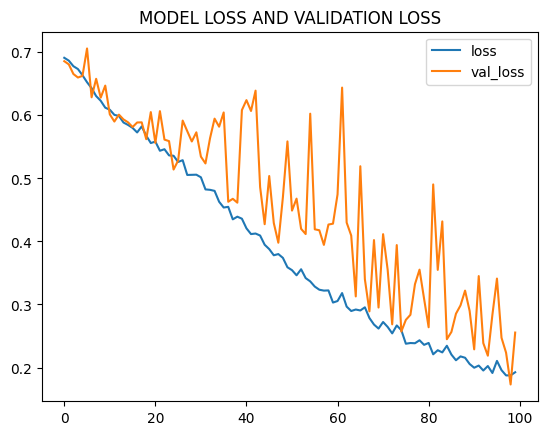

In [15]:
"""VISULIZE MODEL """
plt.plot(np.arange(100) , model_information['loss'] , label="loss")
plt.plot(np.arange(100) , model_information['val_loss'] , label="val_loss")
plt.title('MODEL LOSS AND VALIDATION LOSS')
plt.savefig('MOBILE_pretrained_loss.png')
plt.legend()
plt.show()

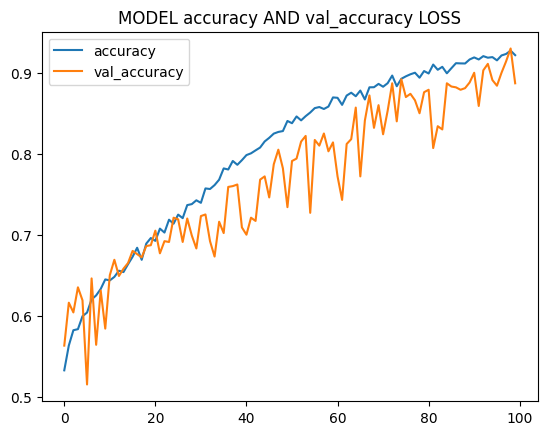

In [16]:
"""VISULIZE MODEL """
plt.plot(np.arange(100) , model_information['accuracy'] , label="accuracy")
plt.plot(np.arange(100) , model_information['val_accuracy'] , label="val_accuracy")
plt.title('MODEL accuracy AND val_accuracy LOSS')
plt.savefig('MOBILE_pretrained_val_accuracy.png')
plt.legend()
plt.show()

In [18]:
import os

test_images = []

# Local path for testing data
test_data = r"K:\DL_Anemia_Jaundice\anemia_model\data\New_Augmented_Anemia_Dataset\Conjuctiva\Testing"

# Traverse all classes inside Testing folder
for item in os.listdir(test_data):
    item_path = os.path.join(test_data, item)
    if os.path.isdir(item_path):  # Ensure it's a folder
        for img in os.listdir(item_path):
            test_images.append([os.path.join(item_path, img), item])

print(f"Total test images: {len(test_images)}")
print("Sample:", test_images[:5])  # Show first 5 entries


Total test images: 1000
Sample: [['K:\\DL_Anemia_Jaundice\\anemia_model\\data\\New_Augmented_Anemia_Dataset\\Conjuctiva\\Testing\\Anemic\\Anemic-001FV_aug13.png', 'Anemic'], ['K:\\DL_Anemia_Jaundice\\anemia_model\\data\\New_Augmented_Anemia_Dataset\\Conjuctiva\\Testing\\Anemic\\Anemic-001FV_aug14.png', 'Anemic'], ['K:\\DL_Anemia_Jaundice\\anemia_model\\data\\New_Augmented_Anemia_Dataset\\Conjuctiva\\Testing\\Anemic\\Anemic-001FV_aug2.png', 'Anemic'], ['K:\\DL_Anemia_Jaundice\\anemia_model\\data\\New_Augmented_Anemia_Dataset\\Conjuctiva\\Testing\\Anemic\\Anemic-001_aug16.png', 'Anemic'], ['K:\\DL_Anemia_Jaundice\\anemia_model\\data\\New_Augmented_Anemia_Dataset\\Conjuctiva\\Testing\\Anemic\\Anemic-001_aug17.png', 'Anemic']]


In [19]:
import random
random.shuffle(test_images)

In [20]:
test = test_images[0]
img = test[0]
label = test[1]

In [21]:
label

'Non-Anemic'

In [22]:
class_names = train_generator.class_indices
classes = list(class_names.keys())
classes

['Anemic', 'Non-Anemic']

### evaluation 

In [23]:
test_data_eval = model.evaluate(valid_generator)

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8870 - loss: 0.2555


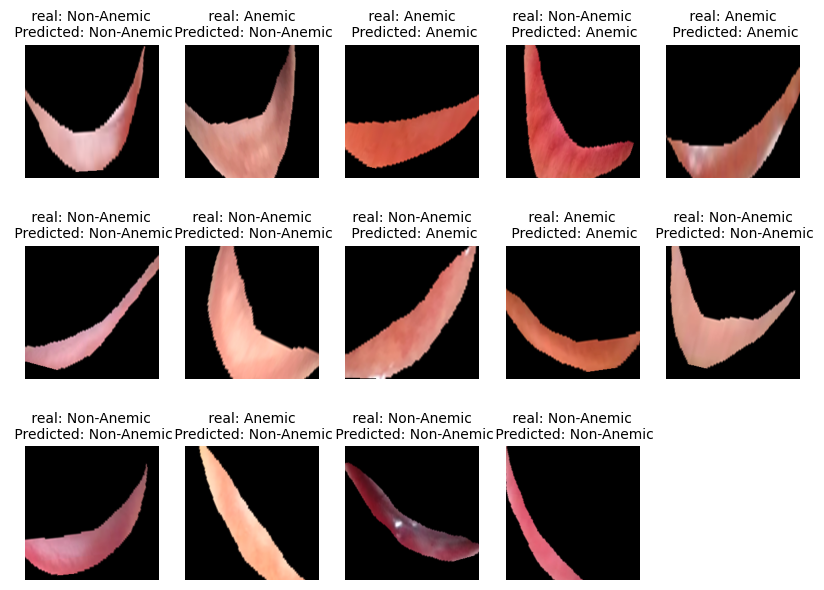

In [24]:
#TEST VISULIZATION
from tensorflow.keras.preprocessing import image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(64, 64))  # Assuming your model expects 64x64 images
    img = image.img_to_array(img)
    img = img /255.0
    img = np.expand_dims(img, axis=0)
    return img

# Function to predict class and visualize the image
def predict_and_visualize(image_paths):
    plt.figure(figsize=(10, 10))
    for i, img_path in enumerate(image_paths):
        img = preprocess_image(img_path[0])
        prediction = model.predict(img , verbose=0)
        
        predicted_class = classes[int(prediction.round()[0][0])]

        # Load and display the image
        plt.subplot(4, 5, i+1)
        plt.imshow(image.load_img(img_path[0]))
        plt.title(f' real: {img_path[1]} \n Predicted: {predicted_class}' , fontsize=10 )
        plt.axis('off')
    plt.savefig('result.png')
    plt.show()
    
predict_and_visualize(test_images[:14])